# Bayes Learning

## 1. The Data

In this notebook, we will compare the implementations of classic Naive Bayesian algorithms on the Adult dataset. There are multiple Naive Bayesian algorithms provided in scikit-learn library, including Guassin Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes and Categorical Naive Bayes. Here are the detailed descriptions for each type of Naive Bayes algorithms:

|Type|Description|Assumption|
|--|--|--|
|Guassin Naive Bayes (GaussianNB)|implements the Gaussian Naive Bayes algorithm for classification|Features are assumed to be Gaussian distributed|
|Multinomial Naive Bayes (MultinomialNB)|classic naive Bayes variants used in text classification|Data is assumed to be multinomially distributed|
|Complement Naive Bayes (ComplementNB)|An adaption of Multinomila Naive Bayes|Data is assumed to be multinomially distributed|
|Bernoulli Naive Bayes (BernoulliNB)|implements the naive Bayes training and classification algorithms|Data is assumed to be multivariate Bernoulli distributed|
|Categorical Naive Bayes (CategoricalNB)|implements the Categorical Naive Bayes algorithm for classification|Each feautre is assumed to be categorically distributed|

Our Adult dataset consists of 7 numerical features and 8 categorical features, and we aim at classifying people's income type using their census features. Hence, those algorithms (MultinomialNB, ComplementNB) specialized in text classification will not be included in this analysis. 

### 1.1 Importing the Data

In [1]:
import pandas as pd

data_train = pd.read_csv('./data_train.csv')
data_train = data_train.reset_index()

data_test = pd.read_csv('./data_test.csv')
data_test = data_test.reset_index()


In [2]:
#Store all the categorical features
categorical = [var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

#Store all the numerical features
numerical = [var for var in data_train.columns if data_train[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
There are 8 numerical variables

The numerical variables are :

 ['index', 'age', 'fnlwgt', 'educational_num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


## 2. Data Preprocessing

In [3]:
# Spliting the feature columns and target column
xs_train = data_train.drop(['income'], axis=1)
ys_train = data_train['income']

xs_test = data_test.drop(['income'], axis=1)
ys_test = data_test['income']

In [4]:
# Spliting the training set and validation set by 20%
from sklearn.model_selection import train_test_split

xs_train_v, xs_val, ys_train_v, ys_val = train_test_split(xs_train, ys_train, test_size=0.2, random_state=42)

xs_train_v = xs_train_v.reset_index()
xs_val = xs_val.reset_index()

ys_train_v = ys_train_v.reset_index()
ys_val = ys_val .reset_index()

### 2.1 For Guassian Naive Bayes

For GuassianNB(), we need to encode all the categorical variables.

In [5]:
!pip install category_encoders
import category_encoders as ce

In [6]:
# Since our categorical data does not have a natural ranking, one-hot encoding is used
encoder_gnb = ce.OneHotEncoder(cols=categorical)

xs_gnb_train = encoder_gnb.fit_transform(xs_train_v)
ys_gnb_train = ys_train_v['income']

xs_gnb_val = encoder_gnb.transform(xs_val)
ys_gnb_val = ys_val['income']

### 2.2 For Catetgorical Naive Bayes

For CategoricalNB(), we need to convert convert all the numerical features into categorical features by discretization. And they will be discretized by KBinsDiscretizer(), according to their histogram distribution showing in section EDA results.

#### 2.2.1 Age

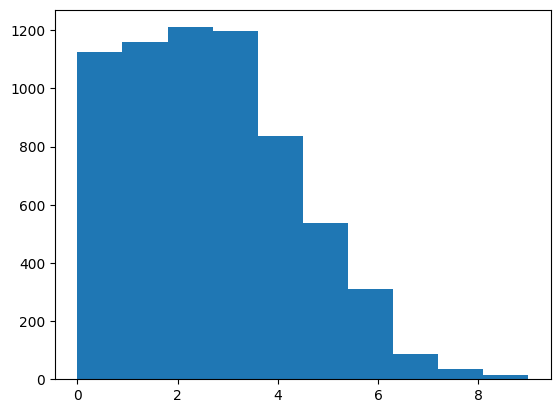

In [7]:
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

age_d = xs_train_v['age']
# reshape the Age column
age_d=age_d.values.reshape(-1,1)


# define the kbinsdiscretizer for Age with 8 bins
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
age_trans = kbins.fit_transform(age_d)



#process the Age column in validation set as well
age_dv = xs_val['age']
age_dv=age_dv.values.reshape(-1,1)


kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
age_trans_v = kbins.fit_transform(age_dv)

# histogram of the transformed data
pyplot.hist(age_trans_v, bins=10)
pyplot.show()

#### 2.2.2 fnlwgt

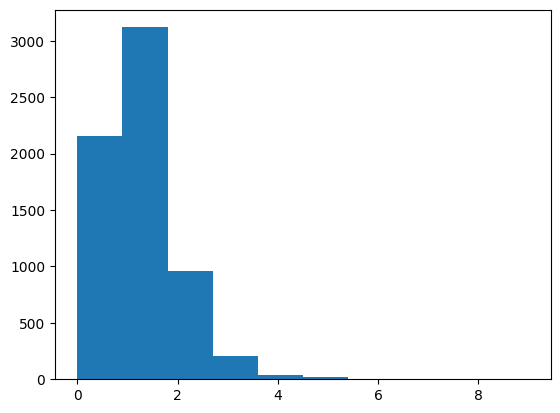

In [8]:
fw_d = xs_train_v['fnlwgt']
# reshape the Final weight column
fw_d=fw_d.values.reshape(-1,1)

# define the kbinsdiscretizer for final weight with 8 bins
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
fw_trans = kbins.fit_transform(age_d)



fw_dv = xs_val['fnlwgt']
fw_dv=fw_dv.values.reshape(-1,1)

#process the finalweight column in validation set as well
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
fw_trans_v = kbins.fit_transform(fw_dv)

# histogram of the transformed data
pyplot.hist(fw_trans_v, bins=10)
pyplot.show()

#### 2.2.2 educational_num

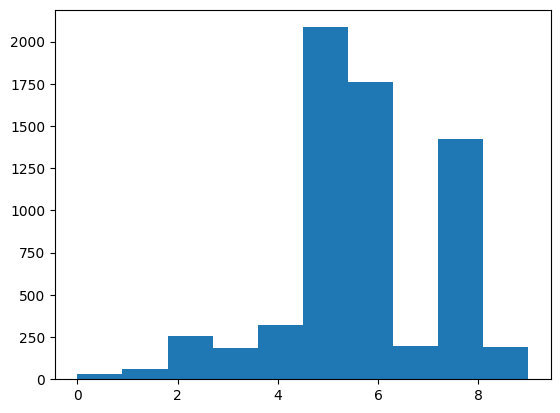

In [9]:
edunum_d = xs_train_v['educational_num']
# reshape the educational num column
edunum_d=edunum_d.values.reshape(-1,1)


# define the kbinsdiscretizer for educational num with 10 bins
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
edunum_trans = kbins.fit_transform(edunum_d)


#process the educational num column in validation set as well
edunum_dv = xs_val['educational_num']
edunum_dv=edunum_dv.values.reshape(-1,1)


kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
edunum_trans_v = kbins.fit_transform(edunum_dv)

# histogram of the transformed data
pyplot.hist(edunum_trans_v, bins=10)
pyplot.show()

#### 2.2.3 capital-gain

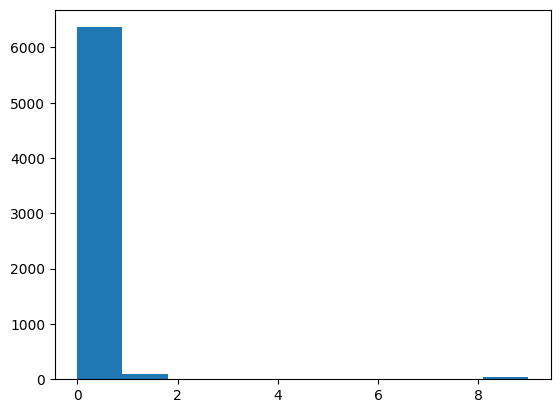

In [10]:
cg_d = xs_train_v['capital-gain']
# reshape the capital gain column
cg_d=cg_d.values.reshape(-1,1)


# define the kbinsdiscretizer for capital gain with 10 bins
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
cg_trans = kbins.fit_transform(cg_d)

#process the capital gain column in validation set as well
cg_dv = xs_val['capital-gain']
cg_dv=cg_dv.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
cg_trans_v = kbins.fit_transform(cg_dv)


# histogram of the transformed data
pyplot.hist(cg_trans_v, bins=10)
pyplot.show()

#### 2.2.4 capital-loss

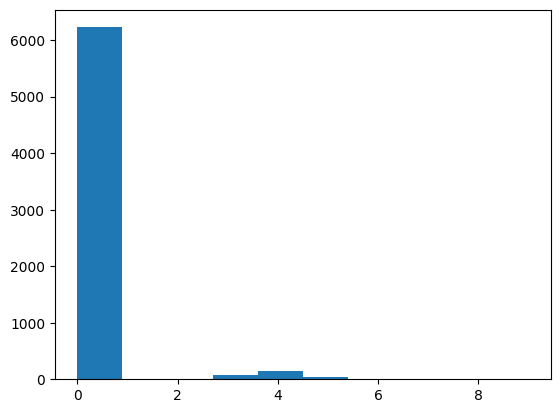

In [11]:
#Following the similar process as above
cl_d = xs_train_v['capital-loss']
cl_d=cl_d.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
cl_trans = kbins.fit_transform(cl_d)

cl_dv = xs_val['capital-loss']
cl_dv=cl_dv.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
cl_trans_v = kbins.fit_transform(cl_dv)


pyplot.hist(cl_trans_v, bins=10)
pyplot.show()

#### 2.2.5 hours-per-week

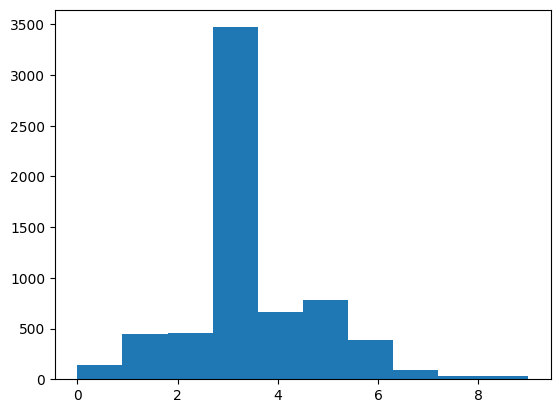

In [12]:
hours_d = xs_train_v['hours-per-week']
hours_d=hours_d.values.reshape(-1,1)


kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
hours_trans = kbins.fit_transform(hours_d)


hours_dv = xs_val['hours-per-week']
hours_dv=hours_dv.values.reshape(-1,1)



kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
hours_trans_v = kbins.fit_transform(hours_dv)


pyplot.hist(hours_trans_v, bins=10)
pyplot.show()

#### 2.2.6 Combining converted data

In [13]:
#convert the array into dataframe, and combine them with those original categorical features
age=pd.DataFrame(age_trans,columns =['age'])
fw=pd.DataFrame(fw_trans,columns =['fnlwgt'])
edunum=pd.DataFrame(edunum_trans,columns =['educational-num'])
cg=pd.DataFrame(cg_trans,columns =['capital-gain'])
cl=pd.DataFrame(cl_trans,columns =['capital-loss'])
hours=pd.DataFrame(hours_trans,columns =['hours-per-week'])


numerical_trans = pd.concat([age,fw,edunum,cg,cl,hours],axis=1)

xs_cnb_train = pd.concat([xs_train_v[categorical],numerical_trans],axis=1)

In [14]:
# Similarly for the validation dataset
age_v=pd.DataFrame(age_trans_v,columns =['age'])
fw_v=pd.DataFrame(fw_trans_v,columns =['fnlwgt'])
edunum_v=pd.DataFrame(edunum_trans_v,columns =['educational-num'])
cg_v=pd.DataFrame(cg_trans_v,columns =['capital-gain'])
cl_v=pd.DataFrame(cl_trans_v,columns =['capital-loss'])
hours_v=pd.DataFrame(hours_trans_v,columns =['hours-per-week'])


numerical_trans_v = pd.concat([age_v,fw_v,edunum_v,cg_v,cl_v,hours_v],axis=1)

xs_cnb_val = pd.concat([xs_val[categorical],numerical_trans_v],axis=1)

In [15]:
#Encode all the remaining categorical features using one-hot encoder since they do not have natural ranking.
#But the discretized numerical features shoudl remain to be ordinal since they have a natural ranking.
encoder_cnb = ce.OneHotEncoder(cols=categorical)

xs_cnb_train = encoder_cnb.fit_transform(xs_cnb_train)
xs_cnb_val = encoder_cnb.transform(xs_cnb_val)

ys_cnb_train = ys_train_v['income']
ys_cnb_val = ys_val['income']

### 2.3 For Bernoulli Naive Bayes

Since Bernoulli Naive Bayes is suitable for classifying binary features, all the features should be one-hot encoded. Use teh discretized continuous feature from section 2.2.1-2.2.5, numerical_trans, directly.

In [16]:
#However, for bernoulli distribution, we also need to use on-hot encode on numerical features
#numerical_trans are the discretized features from previous section. Now, all the columns will be one-hot encoded.
xs_bnb_train = pd.concat([xs_train_v[categorical],numerical_trans],axis=1)
xs_bnb_val = pd.concat([xs_val[categorical],numerical_trans_v],axis=1)

encoder_bnb = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country',
                    'age', 'fnlwgt', 'educational-num', 'capital-gain',
                    'capital-loss', 'hours-per-week'])

xs_bnb_train = encoder_bnb.fit_transform(xs_bnb_train)
xs_bnb_val = encoder_bnb.transform(xs_bnb_val)

ys_bnb_train = ys_train_v['income']
ys_bnb_val = ys_val['income']


## 3. Model Training

### 3.1 Guassian Naive Bayes

In [17]:
# Drop the extra columns cause by re-indexing
xs_gnb_train = xs_gnb_train.drop(['level_0','index'],axis = 1)
xs_gnb_val = xs_gnb_val.drop(['level_0','index'],axis = 1)

In [18]:
#Initialize Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(xs_gnb_train, ys_gnb_train)

#Get prediction
ys_gnb_pred = gnb.predict(xs_gnb_val)

### 3.2 Validation for Guassian Naive Bayes

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ys_gnb_val, ys_gnb_pred)))

print('Training set score: {:.4f}'.format(gnb.score(xs_gnb_train, ys_gnb_train)))

print('Validation set score: {:.4f}'.format(gnb.score(xs_gnb_val, ys_gnb_val)))

#Precision = TP/(TP+FP)
precision = precision_score(ys_gnb_val, ys_gnb_pred)
print('Model precision score: {:.4f}'.format(precision))

#Recall = TP/(FN+TP)
recall = recall_score(ys_gnb_val, ys_gnb_pred)
print('Model recall score: {:.4f}'.format(recall))

#The F1 score can be interpreted as a harmonic mean of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0. 
#F1 = 2 * (precision * recall) / (precision + recall)
print('Model f1 score: {:.4f}'.format(f1_score(ys_gnb_val, ys_gnb_pred)))

#ROC-AUC score
print('Model ROC-AUC score: {:.4f}'.format(roc_auc_score(ys_gnb_val, ys_gnb_pred)))

Model accuracy score: 0.7992
Training set score: 0.7943
Validation set score: 0.7992
Model precision score: 0.6770
Model recall score: 0.3202
Model f1 score: 0.4347
Model ROC-AUC score: 0.6358


### 3.3 Catetgorical Naive Bayes

In [20]:
from sklearn.naive_bayes import CategoricalNB

#Initialize categorical Naive Bayes
cnb = CategoricalNB()

#Fit the model
cnb = cnb.fit(xs_cnb_train, ys_cnb_train)

#Get prediction
ys_cnb_pred = cnb.predict(xs_cnb_val)

### 3.4 Validation for Categorical Naive Bayes

In [21]:
#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ys_cnb_val, ys_cnb_pred)))

print('Training set score: {:.4f}'.format(cnb.score(xs_cnb_train, ys_cnb_train)))

print('Validation set score: {:.4f}'.format(cnb.score(xs_cnb_val, ys_cnb_val)))

#Precision = TP/(TP+FP)
precision = precision_score(ys_cnb_val, ys_cnb_pred)
print('Model precision score: {:.4f}'.format(precision))

#Recall = TP/(FN+TP)
recall = recall_score(ys_cnb_val, ys_cnb_pred)
print('Model recall score: {:.4f}'.format(recall))

#The F1 score can be interpreted as a harmonic mean of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0. 
#F1 = 2 * (precision * recall) / (precision + recall)
print('Model f1 score: {:.4f}'.format(f1_score(ys_cnb_val, ys_cnb_pred)))

#AUC-ROC socre
print('Model ROC-AUC score: {:.4f}'.format(roc_auc_score(ys_cnb_val, ys_cnb_pred)))

Model accuracy score: 0.8182
Training set score: 0.7859
Validation set score: 0.8182
Model precision score: 0.6072
Model recall score: 0.6976
Model f1 score: 0.6493
Model ROC-AUC score: 0.7771


### 3.5 Bernoulli Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB

#Initialize Bernoulli Naive Bayes
bnb = BernoulliNB()

#Fit the model
bnb.fit(xs_bnb_train,ys_bnb_train)

#Get prediction
ys_bnb_pred = bnb.predict(xs_bnb_val)


### 3.6 Validation for Bernoulli Naive Bayes

In [23]:
#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ys_bnb_val, ys_bnb_pred)))

print('Training set score: {:.4f}'.format(bnb.score(xs_bnb_train, ys_bnb_train)))

print('Validation set score: {:.4f}'.format(bnb.score(xs_bnb_val, ys_bnb_val)))

#Precision = TP/(TP+FP)
precision = precision_score(ys_bnb_val, ys_bnb_pred)
print('Model precision score: {:.4f}'.format(precision))

#Recall = TP/(FN+TP)
recall = recall_score(ys_bnb_val, ys_bnb_pred)
print('Model recall score: {:.4f}'.format(recall))

#The F1 score can be interpreted as a harmonic mean of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0. 
#F1 = 2 * (precision * recall) / (precision + recall)
print('Model f1 score: {:.4f}'.format(f1_score(ys_bnb_val, ys_bnb_pred)))

#AUC-ROC score
print('Model ROC-AUC score: {:.4f}'.format(roc_auc_score(ys_bnb_val, ys_bnb_pred)))

Model accuracy score: 0.8253
Training set score: 0.7956
Validation set score: 0.8253
Model precision score: 0.6270
Model recall score: 0.6805
Model f1 score: 0.6526
Model ROC-AUC score: 0.7759


According to a general comparison between those accuracy, precision, recall, f1 and ROC-AUC scores, BernoulliNB() performs better overall. Hence, the Bernoulli Naive Bayes cnb will be chosen.

## 4. Model Tesing

In this section, we will use the unseen testing dataset to test the fincal chosen Categorical Naive Bayes model, cnb. However, we need to transform the testing dataset first.

### 4.1 Testing data preprocessing

In [24]:
##Discretization the numerical features##

#Age
age_t = xs_test['age']
age_t=age_t.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
age_trans_t = kbins.fit_transform(age_t)

#Final weight
fw_t = xs_test['fnlwgt']
fw_t=fw_t.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
fw_trans_t = kbins.fit_transform(fw_t)

#educational_num
edunum_t = xs_test['educational_num']
edunum_t=edunum_t.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
edunum_trans_t = kbins.fit_transform(edunum_t)

#capital gain
cg_t = xs_test['capital-gain']
cg_t=cg_t.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
cg_trans_t = kbins.fit_transform(cg_t)

#capital loss
cl_t = xs_test['capital-loss']
cl_t=cl_t.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
cl_trans_t = kbins.fit_transform(cl_t)

#hours-per-week
hours_t = xs_test['hours-per-week']
hours_t=hours_t.values.reshape(-1,1)

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
hours_trans_t = kbins.fit_transform(hours_t)

In [25]:
age_t=pd.DataFrame(age_trans_t,columns =['age'])
fw_t=pd.DataFrame(fw_trans_t,columns =['fnlwgt'])
edunum_t=pd.DataFrame(edunum_trans_t,columns =['educational-num'])
cg_t=pd.DataFrame(cg_trans_t,columns =['capital-gain'])
cl_t=pd.DataFrame(cl_trans_t,columns =['capital-loss'])
hours_t=pd.DataFrame(hours_trans_t,columns =['hours-per-week'])


numerical_trans_t = pd.concat([age_t,fw_t,edunum_t,cg_t,cl_t,hours_t],axis=1)

xs_bnb_test = pd.concat([xs_test[categorical],numerical_trans_t],axis=1)

In [26]:
# Using the same encoder all other categorical features
xs_bnb_test = encoder_bnb.transform(xs_bnb_test)
ys_bnb_test = ys_test

### 4.2 Model tesing result

In [27]:
# Use unseen testing dataset to test the model cnb
ys_bnb_pred_t = bnb.predict(xs_bnb_test)

In [28]:
#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ys_bnb_test, ys_bnb_pred_t)))

print('Training set score: {:.4f}'.format(bnb.score(xs_bnb_test, ys_bnb_test)))

print('Test set score: {:.4f}'.format(bnb.score(xs_bnb_test, ys_bnb_pred_t)))

#Precision = TP/(TP+FP)
precision = precision_score(ys_bnb_test, ys_bnb_pred_t)
print('Model precision score: {:.4f}'.format(precision))

#Recall = TP/(FN+TP)
recall = recall_score(ys_bnb_test, ys_bnb_pred_t)
print('Model recall score: {:.4f}'.format(recall))

#The F1 score can be interpreted as a harmonic mean of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0. 
#F1 = 2 * (precision * recall) / (precision + recall)
print('Model f1 score: {:.4f}'.format(f1_score(ys_bnb_test, ys_bnb_pred_t)))

print('Model ROC-AUC score: {:.4f}'.format(roc_auc_score(ys_bnb_test, ys_bnb_pred_t)))

Model accuracy score: 0.8327
Training set score: 0.8327
Test set score: 1.0000
Model precision score: 0.6707
Model recall score: 0.5736
Model f1 score: 0.6184
Model ROC-AUC score: 0.7432


### 4.3 Results visualisation

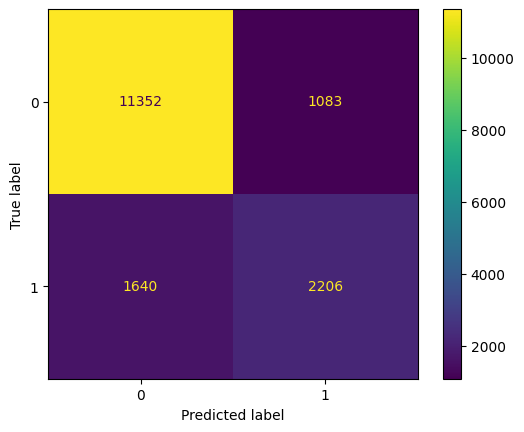

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bnb,xs_bnb_test, ys_bnb_test)

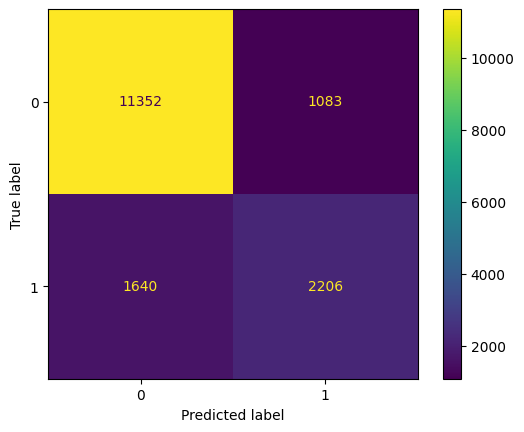

In [30]:
ConfusionMatrixDisplay.from_predictions(ys_bnb_test, ys_bnb_pred_t)

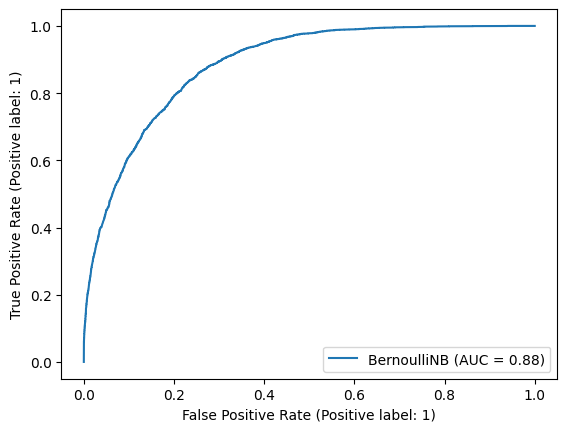

In [31]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(bnb, xs_bnb_test, ys_bnb_test)

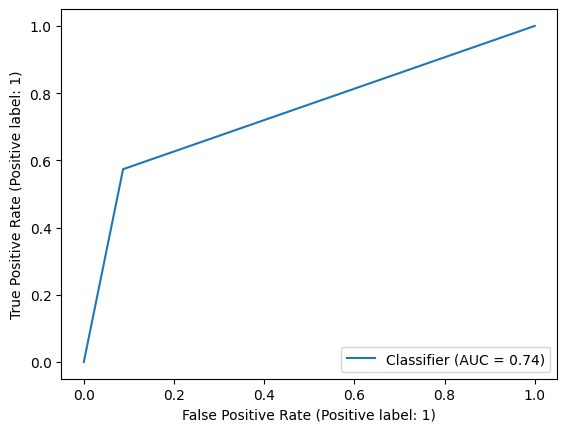

In [32]:
RocCurveDisplay.from_predictions(ys_bnb_test,ys_bnb_pred_t)

In [33]:
# save the model to disk
import pickle
filename = 'BernoullilNaiveBayes.sav'
pickle.dump(bnb, open(filename, 'wb'))

To use the saved model, code in section 4.1 need to be run through to pre-process the data. And the, use the folowing code to load the Bernoulli Naive Bayes Classifer, bnb.

In [34]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xs_bnb_train, ys_bnb_train)
print(result)

0.7955697174447175
